In [459]:
TEST_MATRIX_SIZE = 10
ITERATIONS = 200
import numpy as np


# Generate a small test set
Test_Adjacency_Matrix = np.random.randint(10, size=(TEST_MATRIX_SIZE,TEST_MATRIX_SIZE))
Test_Adjacency_Matrix = np.add(Test_Adjacency_Matrix, np.ones(TEST_MATRIX_SIZE, dtype=int))

for i in range(len(Test_Adjacency_Matrix[0])):
    for j in range(i , len(Test_Adjacency_Matrix[1])):
        if (i==j):
            Test_Adjacency_Matrix[i][j] = 0
        else:
            Test_Adjacency_Matrix[i,j] = Test_Adjacency_Matrix[j,i]

print(Test_Adjacency_Matrix)

Target_Data = Test_Adjacency_Matrix

[[ 0  4  8  2  8  5  4  4  2  2]
 [ 4  0  8 10  7  3  9  2  7  3]
 [ 8  8  0 10  4  8  5  9  5  4]
 [ 2 10 10  0  5  6  2  6  6  2]
 [ 8  7  4  5  0  2  3  1  3  3]
 [ 5  3  8  6  2  0  9  9  5  6]
 [ 4  9  5  2  3  9  0  6  1  6]
 [ 4  2  9  6  1  9  6  0  1  8]
 [ 2  7  5  6  3  5  1  1  0  2]
 [ 2  3  4  2  3  6  6  8  2  0]]


##### Some settings

In [460]:
initial_schedule = list(range(len(Target_Data)))

##### Some methods

In [461]:
def Get_Schedule_Length(given_schedule):
    # Adjust the given_schedule (schedule), for example [A, B, C] -> [A, B, C, A]
    # then compute the travel distance of the given array.
    given_schedule = np.append(given_schedule, given_schedule[0])
    sum = 0
    for j in range(len(given_schedule)-1):
        sum += Target_Data[given_schedule[j],given_schedule[j+1]]
    return sum

##### 3(a) Hill Climbing

In [462]:
best_schedule = initial_schedule
best_result = Get_Schedule_Length(initial_schedule)

HC = []
HC.append(best_result)

# Start Iterations
for i in range(ITERATIONS):
    for j in range(1000): # try 10000 possible route in each iteration. (much less than 15!)
        current_schedule = np.random.permutation(best_schedule)
        if(Get_Schedule_Length(current_schedule)<best_result):
            best_schedule = current_schedule
            best_result = Get_Schedule_Length(current_schedule)
    HC.append(best_result)
# print(HC)
HC_best_schedule = best_schedule

##### 3(b) Random Walk

In [463]:
best_result = Get_Schedule_Length(initial_schedule)
best_schedule = initial_schedule
RW = []
RW.append(best_result)

for i in range(ITERATIONS):
    # random select an route from the permutation of old schedule
    current_schedule = np.random.permutation(best_schedule)
    if(Get_Schedule_Length(current_schedule)<best_result):
        best_schedule = current_schedule
        best_result = Get_Schedule_Length(current_schedule)
    RW.append(best_result)

RW_best_schedule = best_schedule

##### 3(c) Genetic Algorithm

In [464]:
POPULATION_SIZE = 10
CROSSOVER_PROBABILITY = 0.1
NUMBER_OF_PAIRS_OF_MULTI_BIT_FLIP = 2

def Generate_Population(initial_schedule):
    Population = []
    for i in range(POPULATION_SIZE):
        Single_Creature = np.random.permutation(initial_schedule)
        Population.append(Single_Creature)
    return Population

def Roulete_Wheel_Selection(Given_Matrix):
    A = []
    max = -np.inf
    for i in range(len(Given_Matrix)):
        schedule_length = Get_Schedule_Length(Given_Matrix[i])
        A.append(schedule_length)
        if schedule_length > max:
            max = schedule_length

    sum = 0
    for j in range(len(Given_Matrix)):
        sum += A[j]
        A[j] = sum

    Matepool = []
    for k in range(int(len(Given_Matrix)/2)):
        a = np.random.randint(sum)
        i=0
        while(a>A[i]):
            i += 1
        Matepool.append(Given_Matrix[i])

    return Matepool

def Uniform_Crossover(Given_Matrix):
    Test_Matrix = Given_Matrix
    for i in range(int(len(Test_Matrix)/2)):

        for j in range(int(len(Test_Matrix[i]))):
            a = np.random.uniform(0,1,1)
            if a >= CROSSOVER_PROBABILITY:
                # SWAP the elements among two weapons lists.
                Test_Matrix[2*i][j], Test_Matrix[2*i+1][j] = Test_Matrix[2*i+1][j], Test_Matrix[2*i][j]
    return Test_Matrix

def Multi_Bit_Flip_Mutation(Given_Matrix, Number_of_Pairs_of_Multi_Bit_Flip):
    Test_Matrix = Given_Matrix
    # Doubling the population size in the step\
    # \to make the amount of creatures fixed in each generations.
    Test_Matrix = np.concatenate((Test_Matrix, Test_Matrix))

    #
    for i in range(int(len(Test_Matrix)/2)):
        for j in range(Number_of_Pairs_of_Multi_Bit_Flip):
            interchange_location = np.random.randint(int(len(Test_Matrix[i])),size=2)
            Test_Matrix[i][interchange_location[0]], Test_Matrix[i][interchange_location[1]] =\
            Test_Matrix[i][interchange_location[1]], Test_Matrix[i][interchange_location[0]]

    return Test_Matrix

def Get_the_Best_Combination(Given_Matrix, print_result):
    min = np.inf
    for i in range(len(Given_Matrix)):
        if Get_Schedule_Length(Given_Matrix[i]) < min:
            min = Get_Schedule_Length(Given_Matrix[i])
            best_combination = Given_Matrix[i]
    if (print_result):
        print(f'   The best combination in the current generation is: {best_combination}'
              f'\n    with schedule travel distance: {min}')
    return min, best_combination

initial_schedule = list(range(len(Target_Data)))

GA = []
best_result = np.inf
Population = Generate_Population(initial_schedule)
for iters in range(int(ITERATIONS/POPULATION_SIZE)):
    Selected_Creatures = Roulete_Wheel_Selection(Population)
    Syngamy = Uniform_Crossover(Selected_Creatures)
    Next_Generation = Multi_Bit_Flip_Mutation(Syngamy,
                                              NUMBER_OF_PAIRS_OF_MULTI_BIT_FLIP)
    Population = Next_Generation
    current_result, current_schedule = Get_the_Best_Combination(Next_Generation,
                                                                print_result=0)

    if(Get_Schedule_Length(current_schedule)<best_result):
        best_schedule = current_schedule
        best_result = Get_Schedule_Length(current_schedule)
    # Since GA is a population-wise comparison algorithms,
    # append the best result multiple times to compare GA with other algorithms.
    for population_size in range(POPULATION_SIZE):
        GA.append(best_result)

##### 3(d) Simulated Annealing

In [465]:
# Hyperparameters
NO_UPDATE_TIMES = 10e5 #10e4

# Generate Initial Temperature
rand_4pts = []
for i in range(4):
    Creature = np.random.permutation(initial_schedule)
    rand_4pts.append(Get_Schedule_Length(Creature))
init_temp = np.average(rand_4pts)

# Generate Initial Schedule
current_schedule = np.random.permutation(initial_schedule)
SA = []

## Some Initializations
n = 2 # iterations
c = 0.7 # temperature reduction factor
no_update_times = 0
des_schedule = current_schedule
temp = init_temp
iters_sum = 0

while(no_update_times<=NO_UPDATE_TIMES):

    iter = 0

    while((iter<=n)&(no_update_times<=NO_UPDATE_TIMES)):
        # Compute current_state
        current_state = Get_Schedule_Length(des_schedule)

        r = np.random.permutation(des_schedule)
        attempt_state = Get_Schedule_Length(r)

        # Step 3 and Step 4
        del_f = attempt_state - current_state

        if del_f<0:
            #print(f'del_f:{del_f}')
            c = np.random.uniform(0, 1, 1)
            Prob_of_X_2 = np.exp(-del_f/(1*temp))
            #print(f' r = {r} , $P(X_2)$ = {Prob_of_X_2}')
            if Prob_of_X_2 > c:
                des_schedule = r
                #print(f'! assign new design (x) = {des_schedule}')
                SA.append(float(Get_Schedule_Length(r)))
                current_state = attempt_state
                temp = c*temp
                no_update_times = 0
        else:
            no_update_times +=1

        iter += 1
        iters_sum += 1

print(f'   The best combination over all generations is: {des_schedule}')
print(f'\n    with travel distance: {current_state}')

<ipython-input-465-4a034b8211a1>:40: RuntimeWarning: overflow encountered in exp
  Prob_of_X_2 = np.exp(-del_f/(1*temp))


   The best combination over all generations is: [8 6 3 0 9 2 4 5 1 7]

    with travel distance: 23


##### 3(e) Tabu Search

In [466]:
# build a boolean table for TS, to determine whether swap or not
size = len(Target_Data)
TS_boolean_table = np.zeros((size, size), dtype=bool)
for i in range(size):
    TS_boolean_table[0, i] = TS_boolean_table[i, 0] = 1

def Get_Permutation(current_schedule):
    permutation = []
    for i in range(len(current_schedule)):
        for j in range(i+1, len(current_schedule)):
            neighbor = current_schedule.copy()
            neighbor[i] = current_schedule[j]
            neighbor[j] = current_schedule[i]

            # to convenient the work, I set the data structure of permutation matrix as follow
            # i, j will memorized which cities were swapped in the current route.
            # example:
            #   0   1   2      3    ...   15       16      17      18
            #   i   j   City1  City2      City14   City15  City1   0 (the place to fill in total travel distance)
            #   .   .   .      .    ...   .        .       .       .
            #   .   .   .      .    ...   .        .       .       .
            #   .   .   .      .    ...   .        .       .       .

            loc = [i, j]    # correspond to boolean table
            loc.extend(neighbor)    # schedule after randomly swapping two cities
            loc.extend([0,0])   # a place to memorized the city we start and another for total distance
            permutation.append(loc)
    permutation = np.array(permutation)
    return permutation

def Get_New_Schedule(permutation, best_result, boolean_table):
    # declaration
    store_i = 0
    store_j = 0
    current_schedule = []

    # compare all possibilities route in permutation matrix, and choose the best.
    for i in range(len(permutation)):
        sum = Get_Schedule_Length(permutation[i, 2:2+len(Target_Data)])

        if boolean_table[permutation[i,0], permutation[i,1]]!=1:
            permutation[i,2+len(Target_Data)+1] = int(sum)
            if (sum < best_result):
                best_result = sum
                store_i = permutation[i,0]
                store_j = permutation[i,1]
                current_schedule = permutation[i, 2:2+len(Target_Data)]

    # mark the cities that have been swapped
    boolean_table[store_i, store_j] = 1
    boolean_table[store_j, store_i] = 1

    return current_schedule, best_result, boolean_table

In [467]:
current_schedule = initial_schedule
TS = []

best_schedule = current_schedule
best_result = Get_Schedule_Length(initial_schedule)
TS.append(best_result)

for i in range(ITERATIONS):
    # print(f'Step:{i}')
    permutation = Get_Permutation(best_schedule)
    current_schedule, best_result, TS_boolean_table = Get_New_Schedule(permutation,
                                                                       best_result,
                                                                       TS_boolean_table)
    if current_schedule != []:
        best_schedule = current_schedule
    else:
        pass

    TS.append(Get_Schedule_Length(best_schedule))

best_result = Get_Schedule_Length(best_schedule)
TS_best_schedule = best_schedule

<ipython-input-467-a4cacc8dff55>:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if current_schedule != []:


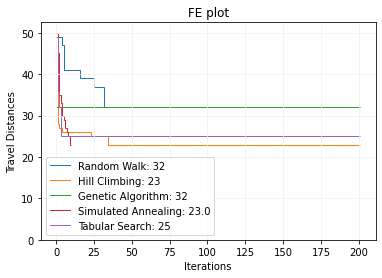

In [468]:
import matplotlib.pyplot as plt
plot1 = plt.stairs(RW, label=f'Random Walk: {RW[-1]}', baseline=None)
plot1 = plt.stairs(HC, label=f'Hill Climbing: {HC[-1]}', baseline=None)
plot1 = plt.stairs(GA, label=f'Genetic Algorithm: {GA[-1]}', baseline=None)
plot1 = plt.stairs(SA, label=f'Simulated Annealing: {SA[-1]}', baseline=None)
plot1 = plt.stairs(TS, label=f'Tabular Search: {TS[-1]}', baseline=None)

plot1 = plt.xlabel('Iterations')
plot1 = plt.ylabel('Travel Distances')
plot1 = plt.title('FE plot')
# plt.xlim()

plot1 = plt.grid(axis='both', color='0.95')

plot1 = plt.legend(loc=3)

plot1 = plt.show()

In [469]:
print(SA)
print(HC_best_schedule)
print(TS_best_schedule)

[50.0, 45.0, 35.0, 33.0, 30.0, 29.0, 27.0, 26.0, 25.0, 23.0]
[6 3 0 9 2 4 5 1 7 8]
[0 3 6 2 4 5 1 7 8 9]
